In [491]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv('../../data/salaries.csv')

df.head()

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


Check for duplicates and drop any   

In [492]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
865    False
866    False
867    False
868    False
869    False
Length: 870, dtype: bool

In [493]:
df = df.drop_duplicates()

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


Strip before and after Whitespaces from entire data frame records

In [495]:
#Remove leading and following spaces in data
# #strip to all rows
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

#strip to all columns
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [496]:
print(df.isna().sum())

Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64


In [497]:
round(df.isnull().sum()/df.shape[0]*100, 2)

Company           0.23
Company Score     9.31
Job Title         0.00
Location          1.49
Date              0.00
Salary           12.18
dtype: float64

In [498]:
df.shape

(870, 6)

In [499]:
# Function to extract the midpoint of salary ranges
def extract_salary_range(salary_str):
    if isinstance(salary_str, str): # check if the input is a string
        salary_str = salary_str.replace('$', '').replace('K', '')
        range_vals = re.findall(r'\d+', salary_str)
        if len(range_vals) == 2:
            return ((int)(range_vals[0]) + int(range_vals[1])) / 2 * 1000
        elif len(range_vals) == 1:
            return int(range_vals[0])  * 1000 # if only one value, then return it
    return np.nan # return NaN if the input is not a string or doesn't match the pattern

# Apply the function to the 'Salary' column
df['Salary_Mean'] = df['Salary'].apply(extract_salary_range)

# Check the result
df[['Salary_Mean']].head()

,Salary_Mean
0,81000.0
1,82500.0
2,106500.0
3,121000.0
4,96500.0


In [500]:
df.head(10)

,Company,Company Score,Job Title,Location,Date,Salary,Salary_Mean
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),81000.0
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),82500.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),106500.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),121000.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),96500.0
5,Spotify,3.9,Backend Engineer II,"New York, NY",1d,$123K - $175K (Employer est.),149000.0
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",7d,$77K - $94K (Glassdoor est.),85500.0
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",30d+,$71K - $100K (Glassdoor est.),85500.0
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",10d,$94K - $148K (Glassdoor est.),121000.0
9,PFF,4.2,Sr. Software Engineer,Remote,1d,$147K - $189K (Employer est.),168000.0


Getting the source of the salary information

In [501]:
df['Source'] = df['Salary'].str.extract('(\([a-zA-Z]+)')
df['Source'] = df['Source'].str.extract('([a-zA-Z]+)')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\kevin\AppData\Local\Temp\ipykernel_9332\2553132580.py:1: SyntaxWarning: invalid escape sequence '\('
  df['Source'] = df['Salary'].str.extract('(\([a-zA-Z]+)')


,Company,Company Score,Job Title,Location,Date,Salary,Salary_Mean,Source
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),81000.0,Glassdoor
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),82500.0,Employer
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),106500.0,Glassdoor
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),121000.0,Employer
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),96500.0,Glassdoor


In [502]:
print(df.isna().sum())

Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
Salary_Mean      121
Source           106
dtype: int64


In [503]:
df['Company'] = df['Company'].astype(str)
print(df.isna().sum())

Company            0
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
Salary_Mean      121
Source           106
dtype: int64


In [504]:
df['Location'] = df.groupby('Company')['Location'].transform(lambda x: x.ffill().bfill())
df = df.dropna(subset=['Location'])

# df.info()

print(df.isna().sum())

C:\Users\kevin\AppData\Local\Temp\ipykernel_9332\810718118.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Location'] = df.groupby('Company')['Location'].transform(lambda x: x.ffill().bfill())


Company            0
Company Score     80
Job Title          0
Location           0
Date               0
Salary           105
Salary_Mean      119
Source           105
dtype: int64


Drop NAN salaries

In [505]:
df = df[df['Salary_Mean'].notna()]
# df['MAX'].fillna(df['MIN'],inplace=True)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,Salary_Mean,Source
473,RippleMatch Opportunities,3.9,Software Engineer,"Herndon, VA",30d+,$99K - $134K (Glassdoor est.),116500.0,Glassdoor
468,Rippling,4.2,Software Engineer,"Dayton, OH",3d,$74K - $131K (Glassdoor est.),102500.0,Glassdoor
701,NORC at the University of Chicago,4.1,"Software Engineer II, Android",United States,30d+,$104K - $166K (Employer est.),135000.0,Employer
197,The Wolf Works LLC,4.4,Node JS,"Austin, TX",2d,$86K - $105K (Glassdoor est.),95500.0,Glassdoor
664,OpenAI,4.6,2128 Software Engineer 1 (Java Focused),"Annapolis Junction, MD",18d,$135K - $155K (Employer est.),145000.0,Employer
...,...,...,...,...,...,...,...,...
26,Ahold Delhaize USA,4.0,Software Engineer - Martech,"Carlisle, PA",2d,$94K - $133K (Glassdoor est.),113500.0,Glassdoor
387,Amex,4.3,Technical Support Engineer (Endpoint Software),Virginia,9d,$100K - $250K (Employer est.),175000.0,Employer
388,Radiance Technologies,4.4,Ecosystems Software Engineer,United States,17d,$100K - $115K (Employer est.),107500.0,Employer
364,Fairfax County Public Schools,4.2,Software Engineer I,"Laurel, MD",30d+,$106K - $125K (Employer est.),115500.0,Employer


In [506]:
def categorize_job_title(title):
    title = title.lower()  # Convert to lowercase for consistency
    if 'backend' in title or 'frontend' in title or 'software engineer' in title:
        return 'Software Engineer'
    elif 'developer' in title or 'development' in title:
        return 'Developer'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'machine learning' in title or 'ai' in title or 'ml' in title:
        return 'Machine Learning/AI Engineer'
    elif 'devops' in title:
        return 'DevOps Engineer'
    elif 'full stack' in title:
        return 'Full Stack Developer'
    elif 'test' in title or 'quality' in title: 
        return 'QA Engineer'
    else:
        return 'Other IT Jobs'
    

df['Job Category'] = df['Job Title'].apply(categorize_job_title)

print(df)

                           Company  Company Score  \
0                         ViewSoft            4.8   
1                          Workiva            4.3   
2       Garmin International, Inc.            3.9   
3                         Snapchat            3.5   
4    Vitesco Technologies Group AG            3.1   
..                             ...            ...   
759                         OpenAI            3.1   
760                     NCR Atleos            3.9   
761  Electronic Warfare Associates            3.8   
762                   BillGO, Inc.            3.3   
763                        Genesys            3.6   

                                             Job Title           Location  \
0                                    Software Engineer       Manassas, VA   
1                            Software Support Engineer             Remote   
2                                 C# Software Engineer           Cary, NC   
3    Software Engineer, Fullstack, 1+ Years of Expe... 

In [507]:
df.head(10)

,Company,Company Score,Job Title,Location,Date,Salary,Salary_Mean,Source,Job Category
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),81000.0,Glassdoor,Software Engineer
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),82500.0,Employer,Other IT Jobs
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),106500.0,Glassdoor,Software Engineer
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),121000.0,Employer,Software Engineer
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),96500.0,Glassdoor,Software Engineer
5,Spotify,3.9,Backend Engineer II,"New York, NY",1d,$123K - $175K (Employer est.),149000.0,Employer,Software Engineer
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",7d,$77K - $94K (Glassdoor est.),85500.0,Glassdoor,Software Engineer
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",30d+,$71K - $100K (Glassdoor est.),85500.0,Glassdoor,Developer
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",10d,$94K - $148K (Glassdoor est.),121000.0,Glassdoor,Software Engineer
9,PFF,4.2,Sr. Software Engineer,Remote,1d,$147K - $189K (Employer est.),168000.0,Employer,Software Engineer


In [508]:
# Convert all values to strings, handle missing data
df['Location'] = df['Location'].fillna('').astype(str)

# Now split into City and State, handling cases where commas may be missing
df[['City', 'State']] = df['Location'].str.split(',', n=1, expand=True)

# Clean up the State column
df['State'] = df['State'].str.strip()

In [509]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Salary_Mean,Source,Job Category,City,State
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),81000.0,Glassdoor,Software Engineer,Manassas,VA
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),82500.0,Employer,Other IT Jobs,Remote,None
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),106500.0,Glassdoor,Software Engineer,Cary,NC
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),121000.0,Employer,Software Engineer,Los Angeles,CA
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),96500.0,Glassdoor,Software Engineer,Seguin,TX


Handling Outliers by using Interquartile Range (IQR)

In [510]:
# Define a function to cap outliers
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

df['Salary_Mean'] = cap_outliers(df['Salary_Mean'])

print(df.isna().sum())
print(df.info())

Company            0
Company Score      0
Job Title          0
Location           0
Date               0
Salary             0
Salary_Mean        0
Source             0
Job Category       0
City               0
State            116
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 763
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        743 non-null    object 
 1   Company Score  743 non-null    float64
 2   Job Title      743 non-null    object 
 3   Location       743 non-null    object 
 4   Date           743 non-null    object 
 5   Salary         743 non-null    object 
 6   Salary_Mean    743 non-null    float64
 7   Source         743 non-null    object 
 8   Job Category   743 non-null    object 
 9   City           743 non-null    object 
 10  State          627 non-null    object 
dtypes: float64(2), object(9)
memory usage: 69.7+ KB
None


In [511]:
# df.drop('Min', axis=1, inplace=True)
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Salary_Mean,Source,Job Category,City,State
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),81000.0,Glassdoor,Software Engineer,Manassas,VA
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),82500.0,Employer,Other IT Jobs,Remote,None
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),106500.0,Glassdoor,Software Engineer,Cary,NC
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),121000.0,Employer,Software Engineer,Los Angeles,CA
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),96500.0,Glassdoor,Software Engineer,Seguin,TX


Days Since Posted

In [512]:
# function to convert job post date to days
def convert_days_since_posted(date_str):
    return int(re.findall(r'\d+', date_str)[0])

# apply the function to the 'Date' column
df['Days_Posted'] = df['Date'].apply(convert_days_since_posted)

# drop original Date column
df.drop('Date', axis=1, inplace=True)

Drop columns that we no longer need

In [513]:
df.drop('Salary', axis=1, inplace=True)
df.drop('Job Title', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)
df.drop('Source', axis=1, inplace=True)
df.drop('City', axis=1, inplace=True)

In [514]:
df.head(10)

,Company,Company Score,Salary_Mean,Job Category,State,Days_Posted
0,ViewSoft,4.8,81000.0,Software Engineer,VA,8
1,Workiva,4.3,82500.0,Other IT Jobs,None,2
2,"Garmin International, Inc.",3.9,106500.0,Software Engineer,NC,2
3,Snapchat,3.5,121000.0,Software Engineer,CA,2
4,Vitesco Technologies Group AG,3.1,96500.0,Software Engineer,TX,2
5,Spotify,3.9,149000.0,Software Engineer,NY,1
6,Infor,4.0,85500.0,Software Engineer,GA,7
7,Amerisoft Corporation,5.0,85500.0,Developer,MI,30
8,WHOOP,3.3,121000.0,Software Engineer,MA,10
9,PFF,4.2,168000.0,Software Engineer,None,1


Categorical Feature Encoding

In [515]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Company', 'Job Category', 'State'])

In [516]:
df.head(10)

,Company Score,Salary_Mean,Days_Posted,Company_3 Reasons Consulting,Company_360care,Company_3R Info,"Company_7-Eleven, Inc.",Company_9th networks Inc,"Company_AB2 Consulting, Inc.",Company_ACI Worldwide,...,State_RI,State_SC,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV
0,4.8,81000.0,8,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,4.3,82500.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.9,106500.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.5,121000.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.1,96500.0,2,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,3.9,149000.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,4.0,85500.0,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,5.0,85500.0,30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,3.3,121000.0,10,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,4.2,168000.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Feature Scaling

In [517]:
# standardize numeric columns
scaler = StandardScaler()
df[['Company Score', 'Days_Posted']] = scaler.fit_transform(df[['Company Score', 'Days_Posted']])

In [518]:
df.head()

,Company Score,Salary_Mean,Days_Posted,Company_3 Reasons Consulting,Company_360care,Company_3R Info,"Company_7-Eleven, Inc.",Company_9th networks Inc,"Company_AB2 Consulting, Inc.",Company_ACI Worldwide,...,State_RI,State_SC,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV
0,1.720957,81000.0,-0.503044,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.769565,82500.0,-1.040572,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.008451,106500.0,-1.040572,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.752662,121000.0,-1.040572,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.513776,96500.0,-1.040572,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


Model Training

Splitting the data

In [519]:
# First we dinde X (Fearues) and y (target variable)
X = df.drop('Salary_Mean', axis=1)
y = df['Salary_Mean']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train a Random Forest regressor

In [520]:
from sklearn.ensemble import RandomForestRegressor

In [521]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 763
Columns: 625 entries, Company Score to State_WV
dtypes: bool(622), float64(3)
memory usage: 474.5 KB
None


In [522]:
# initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model Evaluation

In [523]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [524]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Printing metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')


MAE: 33535.78355704698
RMSE: 46209.43199380724
R2: -0.22511052392126074


Checking on Feature importance

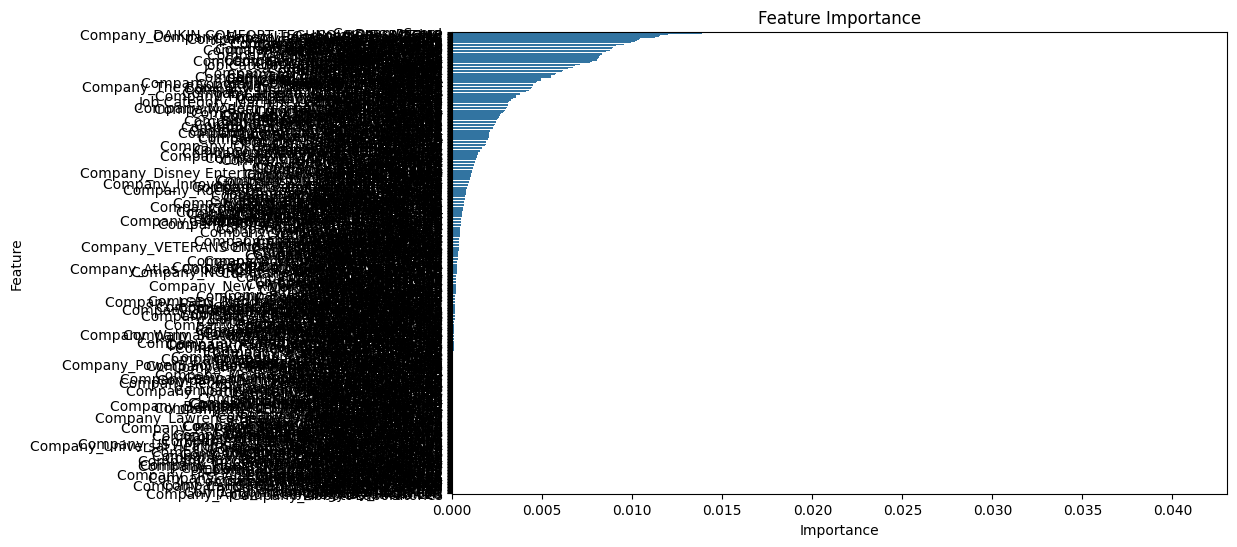

In [526]:
# Get feature importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()